In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os, re
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import BatchNormalization

In [2]:
train_df = pd.read_csv('mixed.csv', sep='\t')
test_df = pd.read_csv('mixed_test.csv', sep='\t')

In [3]:
train_df = shuffle(train_df)

In [4]:
X = train_df[['peak_1', 'h_1', 'k_1', 'l_1', 'peak_2', 'h_2', 'k_2', 'l_2', 'peak_3', 'h_3', 'k_3', 'l_3', 'peak_4', 'h_4', 'k_4', 'l_4', 'peak_5', 'h_5', 'k_5', 'l_5', 'peak_6', 'h_6', 'k_6', 'l_6']]
y = train_df['Space_code']

In [7]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=24))
BatchNormalization()
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
N_iterations = 10
N_folds = 5


scores = []


for i in range(N_iterations):

    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)

    
    for j, (train_index, test_index) in enumerate(skf.split(X, y), 0):

        train_features = X.iloc[train_index]
        test_features = X.iloc[test_index]

        train_labels = y.iloc[train_index]
        test_labels = y.iloc[test_index]
        
        one_hot_train_labels = to_categorical(train_labels)
        one_hot_test_labels = to_categorical(test_labels)
        
        X_val = train_features[:200]
        partial_X_train = train_features[200:]
        y_val = one_hot_train_labels[:200]
        partial_y_train = one_hot_train_labels[200:]

        model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

        scores.append(model.evaluate(test_features, one_hot_test_labels))


In [9]:
accuracy = []
loss = []
for i in range(len(scores)):
    accuracy.append(scores[i][1])
    loss.append(scores[i][0])

In [10]:
training_data_score = np.average(accuracy)
training_data_loss = np.average(loss)

print("Accuracy on training data:", training_data_score)

Accuracy on training data: 0.9694358992576599


In [ ]:
history = model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

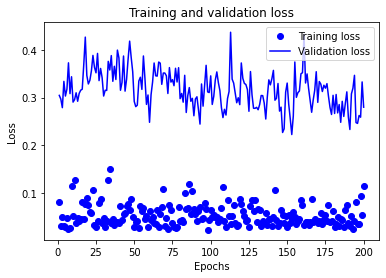

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

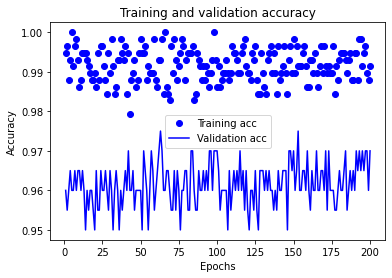

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.evaluate(test_features, one_hot_test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9846


[0.13197855651378632, 0.9846153855323792]

In [21]:
X_test = test_df[['peak_1', 'h_1', 'k_1', 'l_1', 'peak_2', 'h_2', 'k_2', 'l_2', 'peak_3', 'h_3', 'k_3', 'l_3', 'peak_4', 'h_4', 'k_4', 'l_4', 'peak_5', 'h_5', 'k_5', 'l_5', 'peak_6', 'h_6', 'k_6', 'l_6']]
y_test = test_df['space_code']

In [22]:
measured_test_labels = to_categorical(y_test)

In [23]:
model.evaluate(X_test, measured_test_labels)

15/15 [==============================] - 0s 3ms/step - loss: 16.4114 - accuracy: 0.1653


[16.411405563354492, 0.16525423526763916]